# Compare how things change for different sensitivity curves

In [10]:
import legwork as lw

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

#### Plot a sensitivity curve

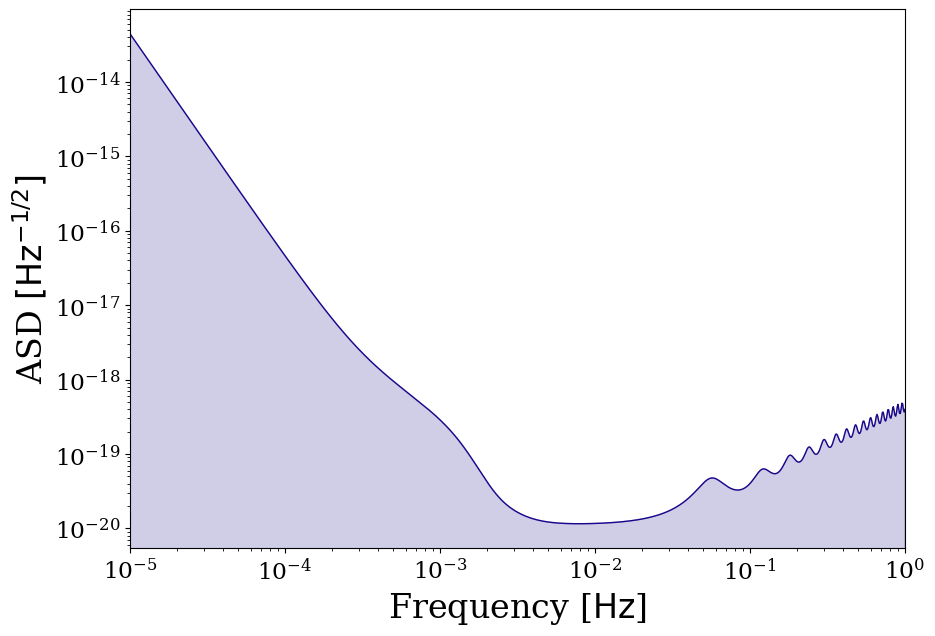

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Frequency [$\\rm Hz$]', ylabel='ASD $[\\rm Hz^{-1/2}]$'>)

In [2]:
lw.visualisation.plot_sensitivity_curve()

#### LISA variations (observation time, arm length)

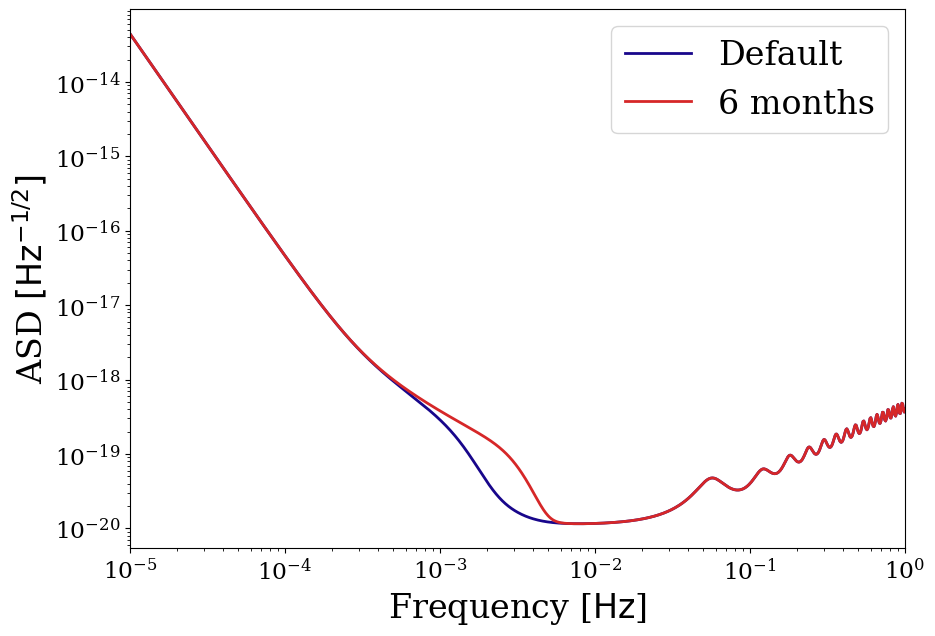

In [7]:
fig, ax = lw.visualisation.plot_sensitivity_curve(label="Default", show=False, fill=False, linewidth=2)
fig, ax = lw.visualisation.plot_sensitivity_curve(t_obs=0.5 * u.yr, label="6 months", show=False, fill=False,
                                                  color="tab:red", linewidth=2, fig=fig, ax=ax)
ax.legend()
plt.show()

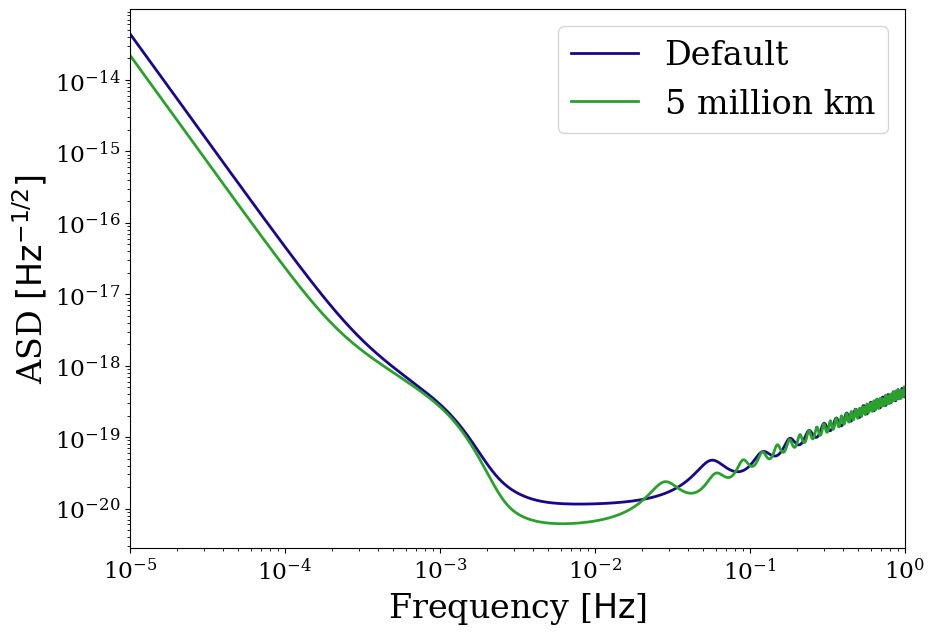

In [8]:
fig, ax = lw.visualisation.plot_sensitivity_curve(label="Default", show=False, fill=False, linewidth=2)
fig, ax = lw.visualisation.plot_sensitivity_curve(L=5e6 * u.km, label="5 million km", show=False, fill=False,
                                                  color="tab:green", linewidth=2, fig=fig, ax=ax)
ax.legend()
plt.show()

#### Different detectors

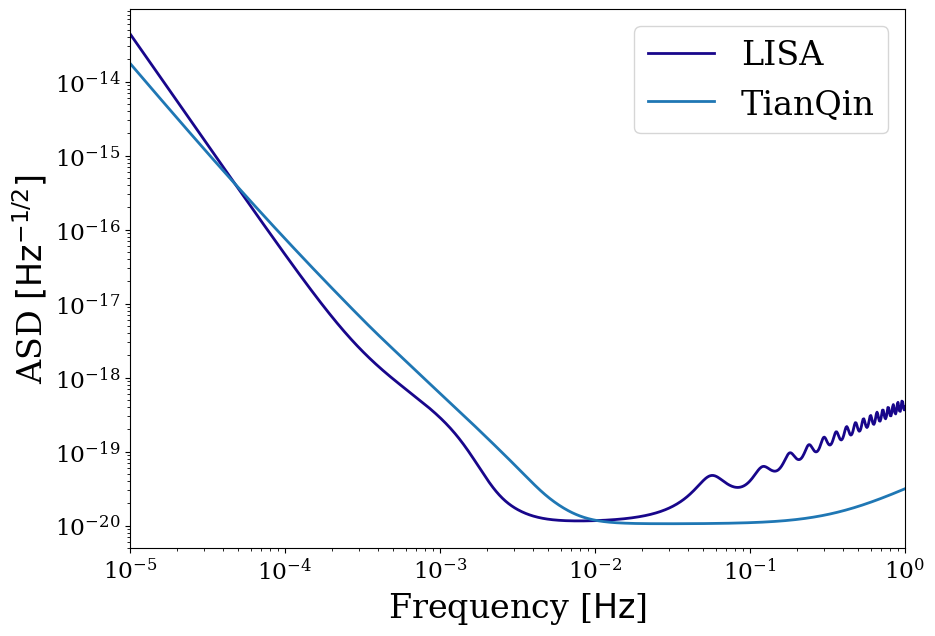

In [9]:
fig, ax = lw.visualisation.plot_sensitivity_curve(label="LISA", show=False, fill=False, linewidth=2)
fig, ax = lw.visualisation.plot_sensitivity_curve(instrument="TianQin", label="TianQin", show=False, fill=False,
                                                  color="tab:blue", linewidth=2, fig=fig, ax=ax)
ax.legend()
plt.show()

#### Calculating SNRs in each

- Avoid interpolating the SC
- Compare LISA and TianQin
- Custom instrument

In [12]:
# create a random collection of sources
n_values = 1500
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.normal(8, 1.5, n_values) * u.kpc
f_orb = 10**(-5 * np.random.power(3, n_values)) * u.Hz
ecc = 1 - np.random.power(5, n_values)

sources = lw.source.Source(m_1=m_1, m_2=m_2, ecc=ecc, dist=dist, f_orb=f_orb,
                           interpolate_sc=False)

In [13]:
default_snr = sources.get_snr().copy()

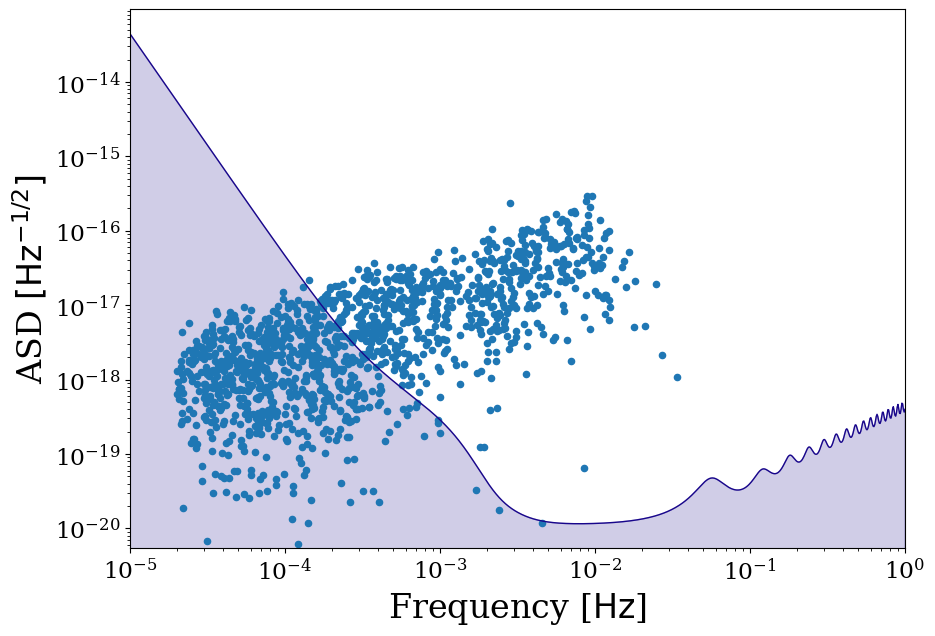

32 circular and evolving sources detected, plotting not yet implemented for evolving sources.
32 eccentric and evolving sources detected, plotting not yet implemented for evolving sources.


(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Frequency [$\\rm Hz$]', ylabel='ASD $[\\rm Hz^{-1/2}]$'>)

In [15]:
sources.plot_sources_on_sc()

In [14]:
def custom_pdf(f, **kwargs):
    """A custom instruments that's 2 times better than LISA at low f"""
    lisa_psd = lw.psd.lisa_psd(f)
    lisa_psd[f < 1e-4 * u.Hz] /= 2
    return lisa_psd

In [16]:
sources.update_sc_params({
    "instrument": "custom",
    "custom_psd": custom_pdf
})

In [17]:
sources.snr = None
other_snr = sources.get_snr().copy()

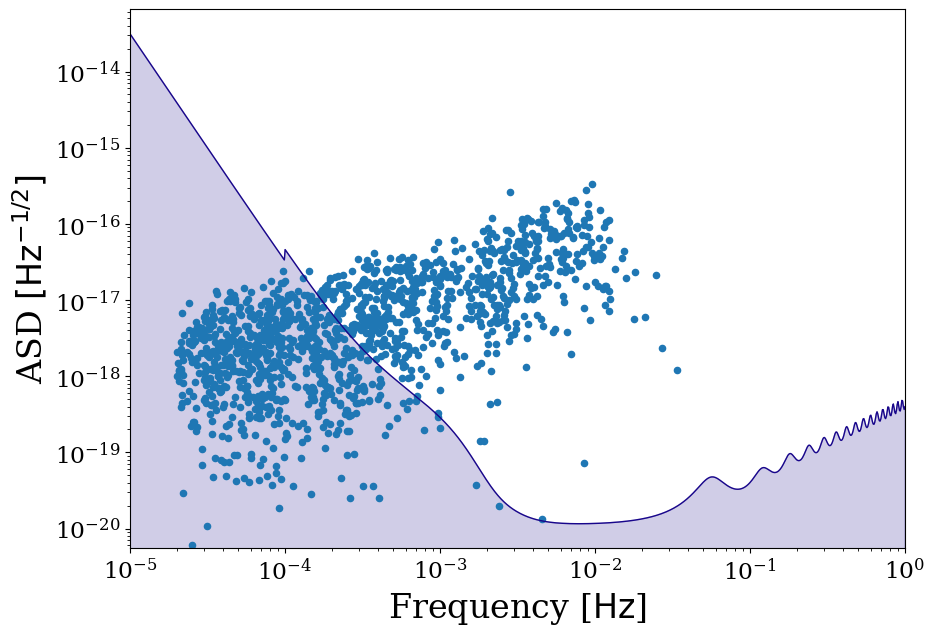

34 circular and evolving sources detected, plotting not yet implemented for evolving sources.
34 eccentric and evolving sources detected, plotting not yet implemented for evolving sources.


(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Frequency [$\\rm Hz$]', ylabel='ASD $[\\rm Hz^{-1/2}]$'>)

In [18]:
sources.plot_sources_on_sc()

In [19]:
other_snr / default_snr

/tmp/ipykernel_126304/4248687708.py:1: RuntimeWarning: invalid value encountered in divide
  other_snr / default_snr


array([1.58113879, 1.11803399, 1.11803399, ..., 1.13854517, 1.49487972,
       1.11803399])